# Customer Churn Analysis - Jupyter Notebook

## I. Introduction

The dataset we are experimenting with was found [here](https://www.kaggle.com/blastchar/telco-customer-churn). To gain insight on what we are working with, I've copied and pasted the bulk of the description from the link:

> **Context**
>
> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." \[IBM Sample Data > Sets\]
>
> **Content**
>
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
>
> The data set includes information about:
>
> * Customers who left within the last month – the column is called Churn
> * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> * Demographic info about customers – gender, age range, and if they have partners and dependents


The link above doesn't tell us much about the where the data is gathered from, but based on the description of the variables/columns, we can assume that this data is from a telecommuncations company similar to that of Verizon or Comcast.

*Description of columns will be shown in the next section*

As stated in the **Content** section, "Churn" refers to whether or not the customer left the company within the last month or stayed with the company. This will be our target variable.

We're going to investigate this problem using **Random Forest**, **Logistic Regression**, and **Support Vector Machine** to see what information we can find. We can also use these methods to raise new questions and strategies for customer retention.

#### Libraries we'll use:

* More libraries will be imported later in the project. Here below is what we need to get started.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
col_scheme = ["#4374B3", "#FF0B04"] # Color scheme for our plots

## II. Load the Dataset

Let's get started by getting this dataset loaded into our notebook for a small glimpse of the data.

In [2]:
data = pd.read_csv('./data/TelcoCustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Before we go any further, I will share a description of each column as described on the dataset's [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) page. 

**customerID** Customer ID

**gender** Whether the customer is a male or a female

**SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)

**Partner** Whether the customer has a partner or not (Yes, No)

**Dependents** Whether the customer has dependents or not (Yes, No)

**tenure** Number of months the customer has stayed with the company

**PhoneService** Whether the customer has a phone service or not (Yes, No)

**MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** The amount charged to the customer monthly

**TotalCharges** The total amount charged to the customer

**Churn** Whether the customer churned or not (Yes or No)

## III. Exploratory Data Analysis (EDA) & Some Data Cleaning

First, lets view the size of this dataset, find out if anything is missing from it, and if we have any duplicate entries.

In [3]:
print('We have %d rows (observations) of data with %d columns (features).\n' % (data.shape[0], data.shape[1]))
dups = data[data.duplicated()]
print("Number of duplicate rows: %d\n" % len(dups))

We have 7043 rows (observations) of data with 21 columns (features).

Number of duplicate rows: 0



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Also, we want to get a look at the target variable before we go any further.

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

So, right from the start, we see we have a major imbalance in the dataset. Let's visualize this.

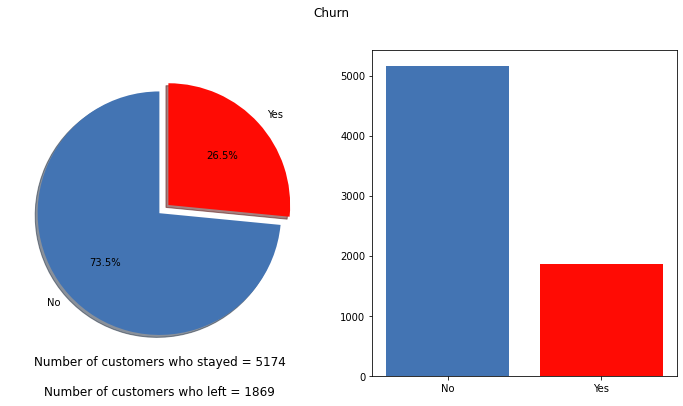

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)

ax1.pie(data['Churn'].value_counts(), explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90, labels=data['Churn'].unique(), colors=col_scheme)
fig.set_facecolor('white')

ax2.bar(data['Churn'].unique(), data['Churn'].value_counts(), color=col_scheme)
ax1.text(0.5, 0.0, "Number of customers who stayed = %d" % len(data[data['Churn'] == 'No']), size=12, ha="center", 
         transform=ax1.transAxes)
ax1.text(0.5,-0.1, "Number of customers who left = %d" % len(data[data['Churn'] == 'Yes']), size=12, ha="center", 
         transform=ax1.transAxes)

plt.suptitle('Churn')
plt.show()

Next, we'll display some plots for the various columns to get a good understanding of how the data is distributed.

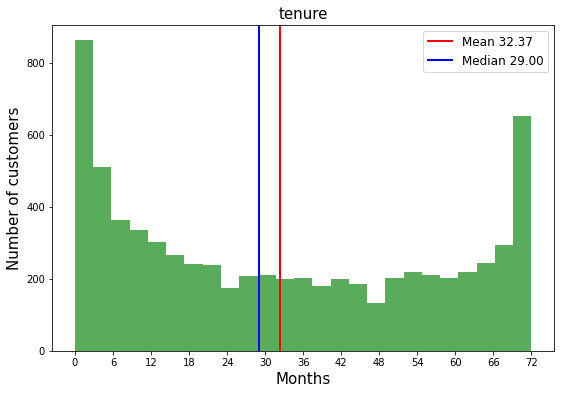

In [8]:
plt.figure(figsize = (9,6))
ten_mean = np.mean(data['tenure'])
ten_med = np.median(data['tenure'])
_ = plt.hist(data["tenure"], bins = 25, alpha = 0.65, color = 'green')
_ = plt.title("tenure", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Months", fontsize = 15)
_ = plt.xticks(np.arange(0, 75, step=6))
_ = plt.axvline(ten_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % ten_mean)
_ = plt.axvline(ten_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % ten_med)
_ = plt.legend(fontsize = 12)

In [9]:
print("Percentage of customers who left before 6 months? : %.2f%%" % ((len(data[data['tenure'] < 6])) / len(data['tenure']) * 100))

Percentage of customers who left before 6 months? : 19.47%


Wow, that is A LOT of customers leaving in their first 5 months with the company, and then something happens around the 6 year mark that is also causing people to leave. Let's focus on those people leaving in the first 5 months and see if they are breaking contract or leaving their Month-to-month plans.

In [10]:
under_6 = data[data['tenure'] < 6]

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


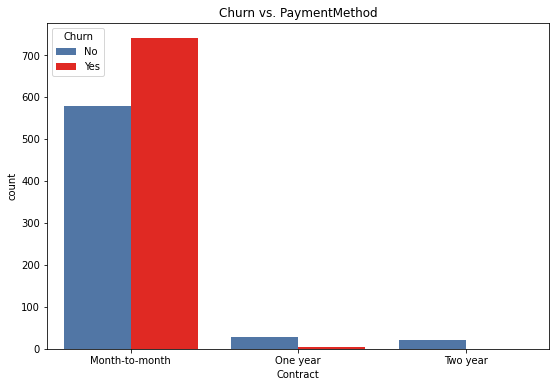

In [11]:
sns.set_palette(sns.color_palette(col_scheme))
plt.figure(figsize=(9,6))
sns.countplot('Contract', hue='Churn', data=under_6).set_title('Churn vs. PaymentMethod')

plt.show()

The good news here is that there aren't that many customers who become so disgruntled that they decide to break contract. The amount of Month-to-month customers leaving before 6 months is still alarming though.

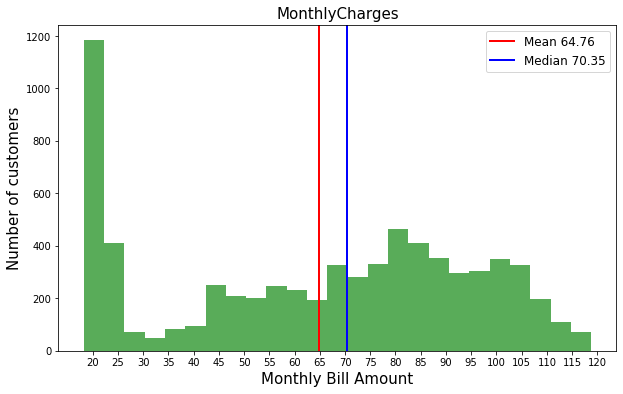

In [12]:
plt.figure(figsize = (10,6))
mc_mean = np.mean(data['MonthlyCharges'])
mc_med = np.median(data['MonthlyCharges'])
_ = plt.hist(data["MonthlyCharges"], bins = 25, alpha = 0.65, color = 'green')
_ = plt.xticks(np.arange(20, 125, step=5))
_ = plt.title("MonthlyCharges", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Monthly Bill Amount", fontsize = 15)
_ = plt.axvline(mc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % mc_mean)
_ = plt.axvline(mc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % mc_med)
_ = plt.legend(fontsize = 12)

In [13]:
print("Percentage of customers with a Monthly Bill of $25 or less? %.2f%%" % ((len(data[data['MonthlyCharges'] < 25.01])) / len(data['MonthlyCharges']) * 100))

Percentage of customers with a Monthly Bill of $25 or less? 19.96%


For some odd reason, we run into an small issue here where **TotalCharges** is being read as a string variable. We'll coerce it to a float so we can proceed with our histogram.

In [14]:
# Convert data in 'TotalCharges' from string to float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [15]:
print("How many missing values in 'TotalCharges' after coercion? : %d" % data['TotalCharges'].isnull().sum())
print("What percentage of the data are these missing values? : %0.2f%%" % ((data['TotalCharges'].isnull().sum()) / (len(data['TotalCharges'])) * 100))

How many missing values in 'TotalCharges' after coercion? : 11
What percentage of the data are these missing values? : 0.16%


After coercion of **TotalCharges** from string to float, we see that we actaully do have some missing values. It is safe to assume that these values are simply missing at random, so we’ll just remove these observations considering they only account for **0.16%** of the data.

In [16]:
data2 = data[data["TotalCharges"].notnull()] # Keep rows for which 'TotalCharges' has recorded data
data2 = data2.reset_index()[data2.columns] # Reset the index of the dataframe

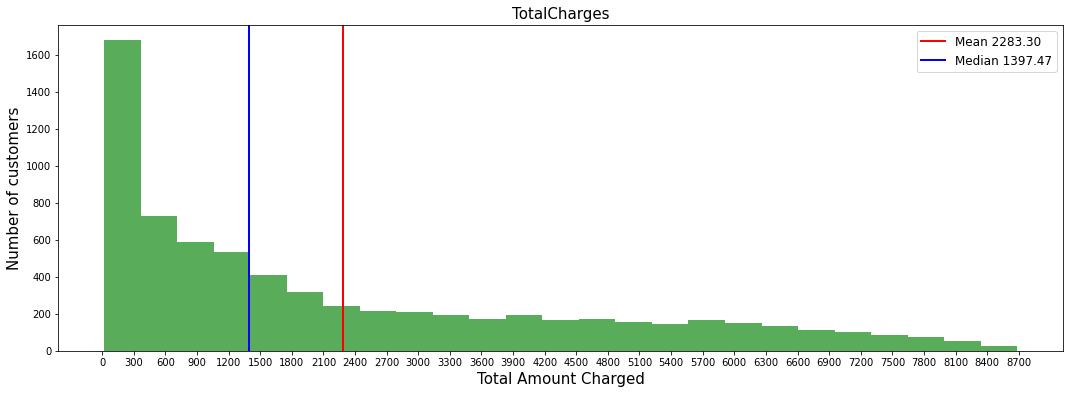

In [17]:
plt.figure(figsize = (18,6))
tc_mean = np.mean(data2['TotalCharges'])
tc_med = np.median(data2['TotalCharges'])
_ = plt.hist(data2['TotalCharges'], bins = 25, alpha = 0.65, color = 'green')
_ = plt.title('TotalCharges', fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Total Amount Charged", fontsize = 15)
_ = plt.xticks(np.arange(0, 8800, 300))
_ = plt.axvline(tc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % tc_mean)
_ = plt.axvline(tc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % tc_med)
_ = plt.legend(fontsize = 12)

In [18]:
print("Percentage of customers with TotalCharges less than $300? %.2f%%" % ((len(data2[data2['TotalCharges'] < 300])) / len(data2['TotalCharges']) * 100))

Percentage of customers with TotalCharges less than $300? 21.33%


We had to stretch out this histogram in order to get a better look, but we see that **21.33%** of the customers had **TotalCharges** less than **\$300**.

With the visuals above we can gather that:
* Getting these customers to stay for even just 6 months is a major problem. This accounts for **19.34%** of customers in the dataset.
* The minimum amount a customer can pay per month is **\\$18.25** and **19.94%** of customers are paying no more than **\\$6.75** of that minimum amount. 
* About 1/5 of the customers in this data set have only been charged less than **\\$300** total, which makes sense when we consider the previous two points.

Something else we should look into are the columns that have a relationship with **InternetService**. For columns **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies** the responses are: 'Yes', 'No', and 'No internet service'. We should make sure that if a customer has no internet service they also have a response for the above columns of 'No internet service'. If this is the case across the board, we can change these columns to binary variables with responses of simply 'Yes' or 'No'.

In [19]:
no_www = data2[data2.InternetService == 'No'] # Subset customers that have no internet service

In [20]:
# Check for unique values in the given columns. Should only print 'No internet service' to confirm our assumption.
print(no_www['OnlineSecurity'].unique())
print(no_www['OnlineBackup'].unique())
print(no_www['DeviceProtection'].unique())
print(no_www['TechSupport'].unique())
print(no_www['StreamingTV'].unique())
print(no_www['StreamingMovies'].unique())

['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']


Confirmed! So, for the above columns/variables, we'll convert to binary. Which, in this case, simply means that we are removing a 3rd response option, leaving us with only 'Yes' or 'No'.

In [21]:
# Create a list for looping through the dataframe and converting to binary 
binaries = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [22]:
# Loop and replace
for i in binaries:
    data2[i] = data2[i].replace({'No internet service' : 'No'})

Next, just a bit of manipulation for the sake of aesthetic in our charts.

In [23]:
data2["SeniorCitizen"] = data2["SeniorCitizen"].replace({1:"Yes",0:"No"}) # We will convert this back later - this is only for the EDA.

Now let's look at customer churning against the different variables.

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

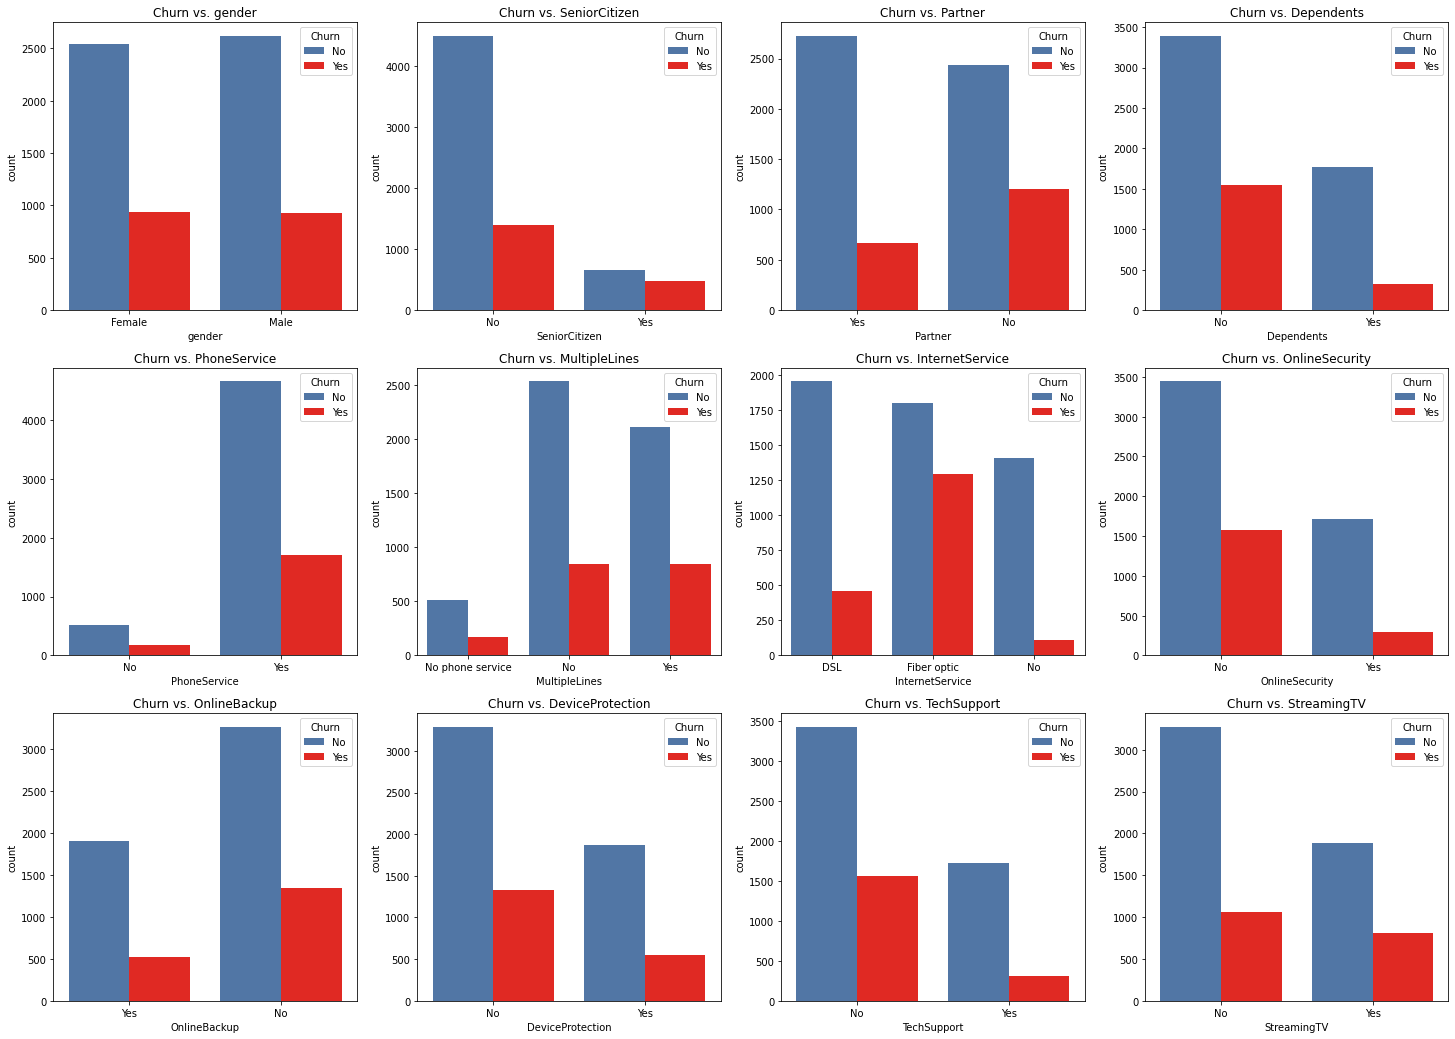

In [24]:
sns.set_palette(sns.color_palette(col_scheme))
fig, ax =plt.subplots(3,4,figsize=(25,18))

sns.countplot('gender', hue='Churn', data=data2, ax=ax[0,0])
ax[0,0].set_title('Churn vs. gender')
sns.countplot('SeniorCitizen', hue='Churn', data=data2, ax=ax[0,1])
ax[0,1].set_title('Churn vs. SeniorCitizen')
sns.countplot('Partner', hue='Churn', data=data2, ax=ax[0,2])
ax[0,2].set_title('Churn vs. Partner')
sns.countplot('Dependents', hue='Churn', data=data2, ax=ax[0,3])
ax[0,3].set_title('Churn vs. Dependents')

sns.countplot('PhoneService', hue='Churn', data=data2, ax=ax[1,0])
ax[1,0].set_title('Churn vs. PhoneService')
sns.countplot('MultipleLines', hue='Churn', data=data2, ax=ax[1,1])
ax[1,1].set_title('Churn vs. MultipleLines')
sns.countplot('InternetService', hue='Churn', data=data2, ax=ax[1,2])
ax[1,2].set_title('Churn vs. InternetService')
sns.countplot('OnlineSecurity', hue='Churn', data=data2, ax=ax[1,3])
ax[1,3].set_title('Churn vs. OnlineSecurity')

sns.countplot('OnlineBackup', hue='Churn', data=data2, ax=ax[2,0])
ax[2,0].set_title('Churn vs. OnlineBackup')
sns.countplot('DeviceProtection', hue='Churn', data=data2, ax=ax[2,1])
ax[2,1].set_title('Churn vs. DeviceProtection')
sns.countplot('TechSupport', hue='Churn', data=data2, ax=ax[2,2])
ax[2,2].set_title('Churn vs. TechSupport')
sns.countplot('StreamingTV', hue='Churn', data=data2, ax=ax[2,3])
ax[2,3].set_title('Churn vs. StreamingTV')

plt.show()

Only a few things of note from these graphs above:
* Senior Citizen customers luckily make up a small portion of the business because almost as many left as stayed.
* The amount of customers with a partner versus with no partner is fairly even. But if we look at customers who don't have a partner and left the company, the amount is almost double those with a partner who left.
* There are less customers using Fiber Optic **InternetService** than there are using DSL service. However, the amount of customers who left the company and had Fiber Optic **InternetService** versus the amount who left and had DSL is nearly double.

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

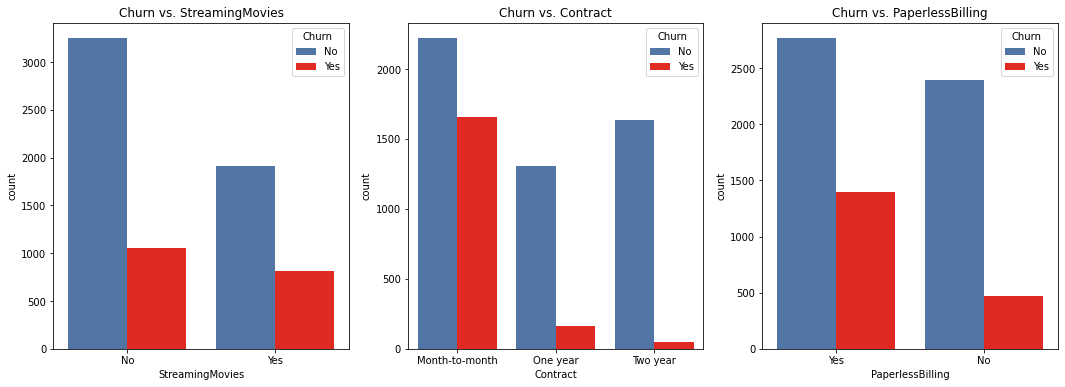

In [25]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

sns.countplot('StreamingMovies', hue='Churn', data=data2, ax=ax[0])
ax[0].set_title('Churn vs. StreamingMovies')
sns.countplot('Contract', hue='Churn', data=data2, ax=ax[1])
ax[1].set_title('Churn vs. Contract')
sns.countplot('PaperlessBilling', hue='Churn', data=data2, ax=ax[2])
ax[2].set_title('Churn vs. PaperlessBilling')

plt.show()

Two things stand out from these three graphs above:
* Look at all those Month-to-month customers who leave the company in the Churn vs. Contract graph! 
* Customers with paperless billing left at a much higher frequency than customers who recieve paper copies of their bill.

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


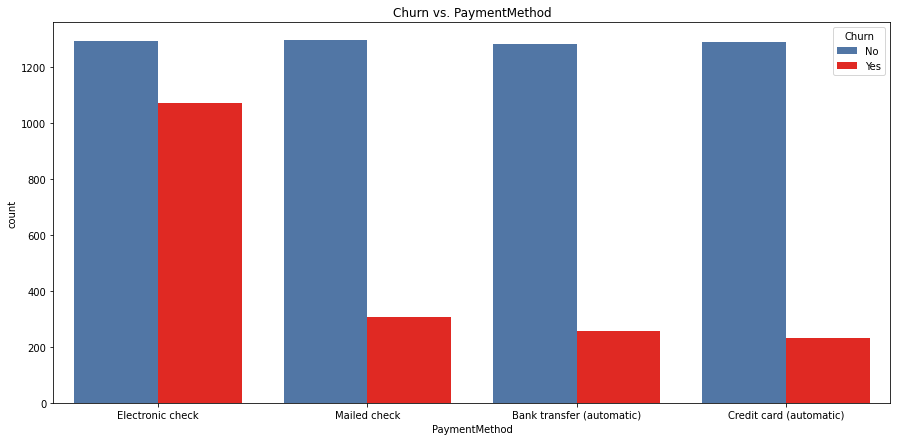

In [26]:
plt.figure(figsize=(15,7))
sns.countplot('PaymentMethod', hue='Churn', data=data2).set_title('Churn vs. PaymentMethod')

plt.show()

This is interesting: when it comes to payment methods, the amount of customers who paid by electronic check and churned is almost 4 times any other method of payment. The raw numbers are below.

In [27]:
pay_meth = pd.DataFrame(data2.groupby(['PaymentMethod', 'Churn'])['Churn'].count())
pay_meth

Churn
PaymentMethod             Churn       
Bank transfer (automatic) No      1284
                          Yes      258
Credit card (automatic)   No      1289
                          Yes      232
Electronic check          No      1294
                          Yes     1071
Mailed check              No      1296
                          Yes      308

## IV. Data Preprocessing

#### More libraries:

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

The goal in this section, Data Preprocessing, is to get our data ready for modeling. In this project we will do that in three ways:
1. We'll be creating dummy variables using `get_dummies()` from `pandas`. This will create new columns out of our categorical features. To demonstrate, Contract will get binary columns for each response: Contract_Month-to-month : 1 or 0, Contract_One year : 1 or 0, etc. and of course, 1 or 0 will be indicate Yes or No, respectively. Another (faster) way we could've done this is using a pipline with a column transformer. However, retaining the column names to learn about feature importances would be a hefty task. 

2. We don't want to go creating a ton of dummy variables, so we'll only use `get_dummies()` on the categorical features that have more than 2 responses. For the rest - the binary features - we can just map all the 'Yes' responses to equal 1 and all the 'No' responses to equal 0.

3. We will then take our continuous variables (**tenure**, **MonthlyCharges**, **TotalCharges**) and scale them using `StandardScaler()`. There is plenty to read on the internet about [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling). Here is the short version: each value in a column is subtracted by the mean of the column, that number is then divided by the standard deviation of the column, that value now replaces the original value and the end result is that the new mean of the column is 0 and the new standard deviation is 1. The point of this process is to get our variables on the same scale for more effective learning. **Random Forest won't see much of an effect from this**.

4. Before we do all that we will split the data in training and testing sets. The testing set will consist of 15% of the full dataset, which means that the training set will have 85% of the full dataset.

5. The final thing that we want to look into is the imbalance of our data. For the sake of our sanity, we'll run the models with the data after we conduct all of the above preprocessing steps. When we get all those results, we will use *Synthetic Minority Over-Sampling Technique* (SMOTE) to balance out the data and see if we get any improvements in accuracy.

We'll be creating a pipeline to streamline this process using `ColumnTransformer()`.

In [29]:
# Drop 'customerID'
data2.drop('customerID', axis=1, inplace=True)

In [30]:
# List of categorical and continuous features, sperating binaries, and exlcuding 'gender' and target variable 'Churn'.
cont_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_feats = [i for i in data2.columns[:-1] if len(data2[i].unique()) == 2]
binary_feats.remove('gender')
cat_feats = [i for i in data2.columns[:-1] if i not in cont_feats + binary_feats]

In [31]:
# Map the binaries 'Yes' and 'No' responses to equal 1 and 0, respectively.
data2[binary_feats] = data2[binary_feats].replace(to_replace=['Yes', 'No'], value=[1, 0])

In [32]:
# Creat the dummy variables for features with more than 2 responses
final_dat = pd.get_dummies(data2, columns=cat_feats)

In [33]:
train_set, test_set = train_test_split(final_dat, test_size=0.15, random_state=2021)

In [34]:
# Finalize our list of features
feats = [i for i in final_dat if i != 'Churn']

In [35]:
# Finalize the structure of 
data_tr = train_set[feats].copy()
train_labels = train_set['Churn'].copy()
data_te = test_set[feats].copy()
test_labels = test_set['Churn'].copy()

In [36]:
# Scale the train data
col_trans = ColumnTransformer([
    ('num', StandardScaler(),  cont_feats)], remainder='passthrough')

train_prep = col_trans.fit_transform(data_tr)

In [37]:
# Scale the test data
test_prep = col_trans.transform(data_te)

In [38]:
# Restructure the list of feature names so that we can use it for feature importances later
new_order = [i for i in data_tr.columns if i not in cont_feats]
new_order = cont_feats+new_order

In [39]:
train_prep.shape

(5977, 29)

## V. Modeling

### Regarding metrics and scoring the performance of our model: Obviously, the company wants to retain as many customers as possible. The goal of this project is to correctly predict which customers will churn. From a business viewpoint, we would want to allocate resources toward focusing on the characteristics of a customer who churns, and spend money there. Interpeting that from a machine learning perspective: we want to focus on **Recall** which is a measure used for the effort of reducing False Negatives. We can't let customers slip away because we wrongly predicted that they would stay.
* TL;DR - We will be using `recall` for our scoring measure.

#### And even more libraries:

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from numpy import random

## V.i Random Forest

Then, we build and run the model. We are going to implement **RandomizedSearchCV** to help us tune our model so we are using the best parameters from a list of different parameters we would like to train on.

In [41]:
# Outline parameters to test
param_grid = {
    'n_estimators': random.randint(100,600,3),
    'max_features' : random.randint(10,29,3),
    'max_depth' : [3,4,5],
    'bootstrap' : [True, False]
}

In [42]:
rf_clf = RandomForestClassifier(random_state=2021)
rf_grid = RandomizedSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy',
                           return_train_score=True)
rf_grid.fit(train_prep, train_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2021),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5],
                                        'max_features': array([16, 16, 22]),
                                        'n_estimators': array([341, 268, 186])},
                   return_train_score=True, scoring='accuracy')

In [43]:
cvres = rf_grid.cv_results_
grid_rf_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_rf_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
0,0.800485,0.796051,"{'n_estimators': 341, 'max_features': 16, 'max_depth': 4, 'bootstrap': True}"
1,0.792872,0.791198,"{'n_estimators': 268, 'max_features': 16, 'max_depth': 3, 'bootstrap': False}"
2,0.792956,0.791365,"{'n_estimators': 186, 'max_features': 16, 'max_depth': 3, 'bootstrap': True}"
3,0.801907,0.795883,"{'n_estimators': 186, 'max_features': 22, 'max_depth': 4, 'bootstrap': True}"
4,0.802242,0.795382,"{'n_estimators': 268, 'max_features': 22, 'max_depth': 4, 'bootstrap': True}"
5,0.792705,0.791031,"{'n_estimators': 186, 'max_features': 16, 'max_depth': 3, 'bootstrap': False}"
6,0.809687,0.794378,"{'n_estimators': 341, 'max_features': 22, 'max_depth': 5, 'bootstrap': False}"
7,0.813201,0.798896,"{'n_estimators': 341, 'max_features': 16, 'max_depth': 5, 'bootstrap': False}"
8,0.815459,0.802577,"{'n_estimators': 268, 'max_features': 22, 'max_depth': 5, 'bootstrap': True}"
9,0.792621,0.790194,"{'n_estimators': 341, 'max_features': 16, 'max_depth': 3, 'bootstrap': True}"


In [44]:
final_model = rf_grid.best_estimator_
rf_preds = final_model.predict(test_prep)
rfmod_pred_score = accuracy_score(test_labels, rf_preds)
rfmod_recall = recall_score(test_labels, rf_preds, pos_label='Yes')

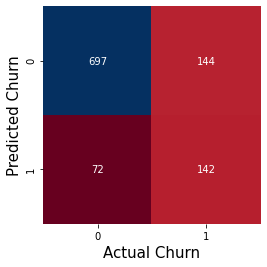

Total predictions = 1055


In [45]:
mat = confusion_matrix(test_labels, rf_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [46]:
print('Train error rate = %.2f%%' % ((1 - rf_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (rfmod_recall * 100))

Train error rate = 19.74%
Test error rate = 20.47%
Test Recall = 49.65%


The training error rate being within ~0.6% of the testing error rate lets us know that we don't really have to worry about overfitting or underfitting.

In [47]:
print(classification_report(test_labels, rf_preds))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       769
         Yes       0.66      0.50      0.57       286

    accuracy                           0.80      1055
   macro avg       0.75      0.70      0.72      1055
weighted avg       0.78      0.80      0.79      1055



The plot above is called a confusion matrix. The X axis is the actual value from the data set, the y axis is the predicted value. Here is what the confusion matrix tells us:
* Our recall score, 49.65%, is not good. It says that we are only correctly predicting when a customer will churn 50% of the time. 
* Overall accuracy at 80% is not ideal. We'll have to check other models and see if we can improve.

The model does fairly well in predicting that customers will stay, but not so much in predicting that a customer will leave.

Next, we'll look at which features the model considered most important for making its predictions.

In [48]:
## Create a pandas dataframe out of our train_prep array and add the columns in the correct order
df = pd.DataFrame(train_prep, columns = new_order)

In [49]:
rf_importances = pd.DataFrame(rf_grid.best_estimator_.feature_importances_,
                                   index = df.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)

rf_importances[:10]

,Importance
Contract_Month-to-month,0.418288
tenure,0.170515
InternetService_Fiber optic,0.143058
TotalCharges,0.082287
MonthlyCharges,0.070523
PaymentMethod_Electronic check,0.031005
InternetService_No,0.009992
InternetService_DSL,0.007849
Contract_Two year,0.007766
TechSupport,0.007652


We have a lot of features, so lets just plot the top 5.

In [50]:
top_5 = rf_importances[rf_importances['Importance'] > .06]

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


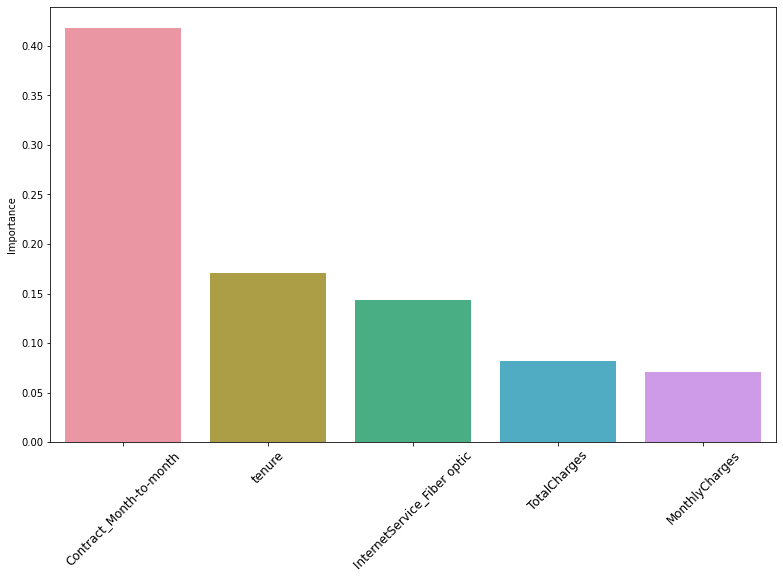

In [51]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_5.index, top_5['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

The barplot above tells us that the most important feature in making predictions is **Contract_Month-to-month**, followed by **tenure**, **InternetService_Fiber optic**, **TotalCharges**, and **MonthlyCharges**, respectively.

## V.ii Logistic Regression Classifier

Now lets play with Logistic Regression and see if we get any better performance.

In [52]:
# Outline parameters to test
param_grid = [
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'penalty': ['none'], 'tol': [.01, .001, .0001]},  
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l1'], 'solver': ['liblinear'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio':[.25, .5, .75], 'tol': [.01, .001, .0001]}
]

In [53]:
log_clf = LogisticRegression()
log_grid = RandomizedSearchCV(log_clf, param_grid, cv=3, scoring='accuracy',
                           return_train_score=True)
log_grid.fit(train_prep, train_labels)

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.1, 0.5, 1],
                                         'max_iter': array([391, 298, 490]),
                                         'penalty': ['l2'], 'solver': ['lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'max_iter': array([167, 495, 484]),
                                         'penalty': ['none'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'max_iter': array([598, 391, 308]),
                                         'penalty': ['l1'],
                                         'solver': ['liblinear'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'l1

In [54]:
cvres = log_grid.cv_results_
grid_log_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
grid_log_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
0,0.804919,0.803748,"{'tol': 0.001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 391, 'C': 1}"
1,0.805170,0.802912,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 490, 'C': 0.5}"
2,0.804752,0.803916,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 235, 'l1_ratio': 0.75, 'C': 1}"
3,0.804752,0.802577,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 305, 'l1_ratio': 0.5, 'C': 0.5}"
4,0.804584,0.804250,"{'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 235, 'l1_ratio': 0.75, 'C': 1}"
5,0.804919,0.803748,"{'tol': 0.001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 298, 'C': 1}"
6,0.804584,0.804250,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 235, 'l1_ratio': 0.75, 'C': 1}"
7,0.805505,0.802578,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 235, 'l1_ratio': 0.5, 'C': 0.1}"
8,0.804752,0.803247,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 235, 'l1_ratio': 0.25, 'C': 1}"
9,0.804668,0.803079,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 305, 'l1_ratio': 0.75, 'C': 0.5}"


In [55]:
final_model = log_grid.best_estimator_
log_preds = final_model.predict(test_prep)
logmod_pred_score = accuracy_score(test_labels, log_preds)
logmod_recall = recall_score(test_labels, log_preds, pos_label='Yes')

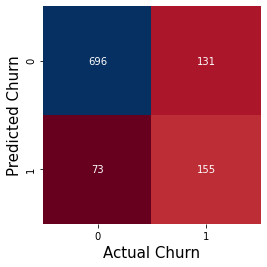

Total predictions = 1055


In [56]:
mat = confusion_matrix(test_labels, log_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [57]:
print('Train error rate = %.2f%%' % ((1 - log_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - logmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (logmod_recall * 100))

Train error rate = 19.58%
Test error rate = 19.34%
Test Recall = 54.20%


Another model that seems like we don't need to wory about overfitting or underfitting.

In [58]:
print(classification_report(test_labels, log_preds))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       769
         Yes       0.68      0.54      0.60       286

    accuracy                           0.81      1055
   macro avg       0.76      0.72      0.74      1055
weighted avg       0.80      0.81      0.80      1055



Understanding the Logistic Regression results:
* Very subtle, ever so slight, but still, improvement on our focus metric recall: 54%
* We're still in the same ballpark for overall performance
* To reiterate, we improved slightly on the recall score, but considering the way this project seems to be playing out, we are going to have to be happy with any imporovement

Looking at feature importanes for this model is a bit of a different venture. We will look at the coefficient values for our features, square them so that they are all positive and then take the sqaure root, and rank them in descending order. The coefficients basically tell us how much weight each feature carries in predicting whether or not a customer will churn.

In [59]:
df = pd.DataFrame(log_grid.best_estimator_.coef_, columns = new_order).transpose()

In [60]:
df['square'] = df[0] ** 2
df['sqrt'] = [np.sqrt(i) for i in df['square']]
df = df.sort_values('sqrt', ascending=False)
df[:10]

,0,square,sqrt
tenure,-1.327972,1.763510,1.327972
InternetService_No,-0.794247,0.630828,0.794247
InternetService_Fiber optic,0.757582,0.573931,0.757582
Contract_Two year,-0.688699,0.474306,0.688699
Contract_Month-to-month,0.686763,0.471643,0.686763
TotalCharges,0.578662,0.334850,0.578662
TechSupport,-0.494835,0.244861,0.494835
OnlineSecurity,-0.344750,0.118853,0.344750
PaperlessBilling,0.330083,0.108955,0.330083
PaymentMethod_Electronic check,0.323298,0.104521,0.323298


In [70]:
top5 = df[df['sqrt'] > 0.6]

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


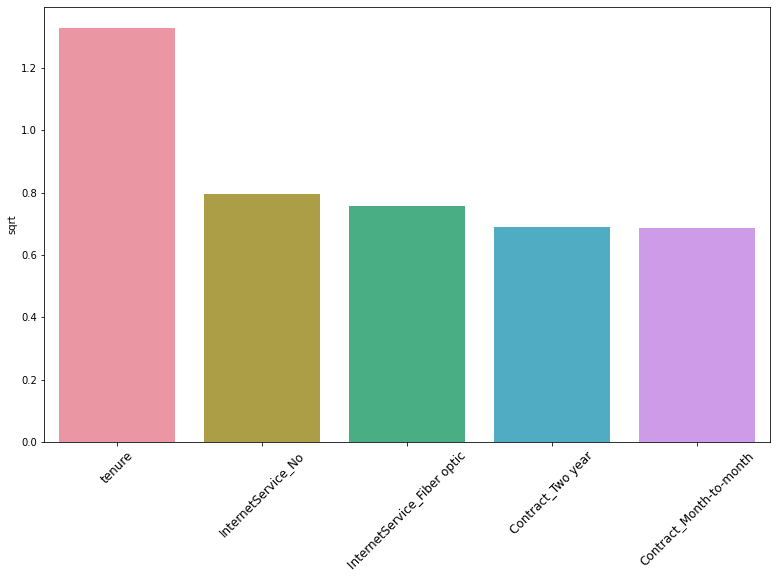

In [71]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top5.index, top5['sqrt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

Now Logistic Regression has a slightly different take. It says that **tenure** is the most important feature, followed by **InternetService_No**, **InternetSevice_Fiber optic**, **Contract_Two year**, and **Contract_Month-to-month**.

## V.iii Support Vector Machine (Classifier)

In [63]:
param_grid = [    
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'tol': [1e-4, 1e-10], 'gamma' : [3,5,7]},
    {'C': [.1,1,10], 'max_iter': [-1], 'tol': [1e-4, 1e-10]},
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'kernel': ['linear']}
  ]

In [64]:
# Numerous convergence warnings
svm_clf = SVC(random_state=2021)
svm_grid = RandomizedSearchCV(svm_clf, param_grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True, n_iter=15)
svm_grid.fit(train_prep, train_labels)

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2694).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2694).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2694).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2694).  Consider

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2021), n_iter=15,
                   param_distributions=[{'C': [0.1, 1, 10], 'gamma': [3, 5, 7],
                                         'max_iter': array([2694, 1377, 1751]),
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10], 'max_iter': [-1],
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10],
                                         'kernel': ['linear'],
                                         'max_iter': array([2394, 1414, 2163])}],
                   return_train_score=True, scoring='accuracy')

In [72]:
cvres = svm_grid.cv_results_
grid_svc_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
grid_svc_df

,Train_Error,Test_Error,Parameter_Set
0,0.960683,0.756065,"{'tol': 1e-10, 'max_iter': 2694, 'gamma': 5, 'C': 1}"
1,0.975824,0.752551,"{'tol': 0.0001, 'max_iter': 2694, 'gamma': 7, 'C': 10}"
2,0.958759,0.758909,"{'tol': 1e-10, 'max_iter': 1751, 'gamma': 3, 'C': 1}"
3,0.735151,0.735151,"{'tol': 1e-10, 'max_iter': 1377, 'gamma': 7, 'C': 0.1}"
4,0.963945,0.755061,"{'tol': 0.0001, 'max_iter': 1377, 'gamma': 5, 'C': 1}"
5,0.735151,0.735151,"{'tol': 1e-10, 'max_iter': 2694, 'gamma': 5, 'C': 0.1}"
6,0.796302,0.794712,"{'max_iter': 2394, 'kernel': 'linear', 'C': 1}"
7,0.735151,0.735151,"{'tol': 0.0001, 'max_iter': 1377, 'gamma': 7, 'C': 0.1}"
8,0.958759,0.758909,"{'tol': 0.0001, 'max_iter': 1751, 'gamma': 3, 'C': 1}"
9,0.973063,0.756399,"{'tol': 1e-10, 'max_iter': 2694, 'gamma': 3, 'C': 10}"


In [66]:
final_model = svm_grid.best_estimator_
svm_preds = final_model.predict(test_prep)
svmmod_pred_score = accuracy_score(test_labels, svm_preds)
svmmod_recall = recall_score(test_labels, svm_preds, pos_label='Yes')

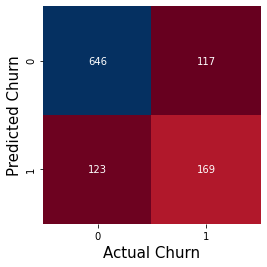

Total predictions = 1055


In [67]:
mat = confusion_matrix(test_labels, svm_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [68]:
print('Train error rate = %.2f%%' % ((1 - svm_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - svmmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (svmmod_recall * 100))

Train error rate = 20.53%
Test error rate = 22.75%
Test Recall = 59.09%


Minor concern for underfitting here, but we're not going to worry about it at this point.

In [73]:
print(classification_report(test_labels, svm_preds))

              precision    recall  f1-score   support

          No       0.85      0.84      0.84       769
         Yes       0.58      0.59      0.58       286

    accuracy                           0.77      1055
   macro avg       0.71      0.72      0.71      1055
weighted avg       0.77      0.77      0.77      1055



In reviewing the **SVM** the overall performance of the model was worst here, however, the metric we are concerned about was best here. The recall score is 59%. While it's not a great number to look at, in terms of business concenrs, this would be the model we need to use in production.

We look at feature importane here the same way as we did with Logistic Regression.

In [74]:
df = pd.DataFrame(svm_grid.best_estimator_.coef_, columns = new_order).transpose()

In [75]:
df['square'] = df[0] ** 2
df['sqrt'] = [np.sqrt(i) for i in df['square']]
df = df.sort_values('sqrt', ascending=False)
df[:10]

,0,square,sqrt
InternetService_Fiber optic,1.081261,1.169125,1.081261
InternetService_No,-0.894180,0.799559,0.894180
TotalCharges,-0.841578,0.708254,0.841578
StreamingTV,0.292654,0.085647,0.292654
PaymentMethod_Electronic check,0.265350,0.070410,0.265350
tenure,-0.244696,0.059876,0.244696
DeviceProtection,0.221001,0.048841,0.221001
Contract_One year,-0.203625,0.041463,0.203625
OnlineSecurity,-0.197305,0.038929,0.197305
PaperlessBilling,0.190401,0.036253,0.190401


In [76]:
top5 = df[df['sqrt'] > 0.25]

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


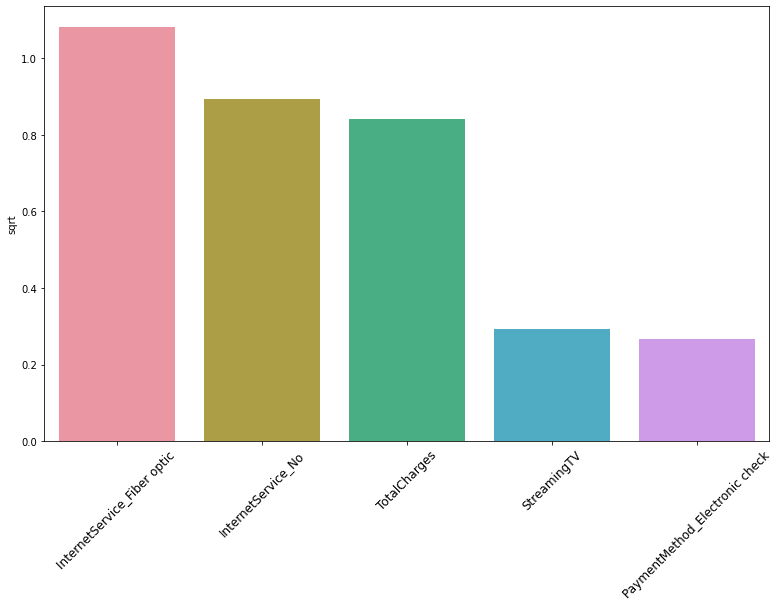

In [77]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top5.index, top5['sqrt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

**SVM** with another take on feature importances, considers **InternetService_Fiber optic** most important. Then, **InternetService_No**, **TotalCharges**, **StreamingTV**, and **PaymentMethod_Electronic check**.

## VI. Conclusions

Let's wrap it all up/summarize and make some conclusions. We can use all this information to raise some more questions as well.

In [117]:
all_recall = [rfmod_recall, logmod_recall, svmmod_recall]

In [118]:
all_acc = [rfmod_pred_score, logmod_pred_score, svmmod_pred_score]

In [119]:
df = pd.DataFrame(list(zip(all_recall, all_acc)), columns =['Recall', 'Accuracy'])

In [120]:
df['Model'] = ['Random Forest', 'Logistic Regresssion', 'Support Vector Machine']

In [122]:
df = df[['Model', 'Recall', 'Accuracy']].reset_index(drop=True)

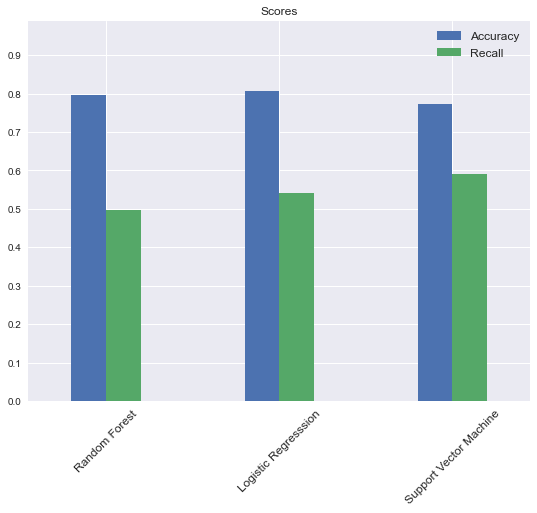

,Model,Recall,Accuracy
0,Random Forest,0.496503,0.795261
1,Logistic Regresssion,0.541958,0.806635
2,Support Vector Machine,0.590909,0.772512


In [124]:
plt.style.use('seaborn')
ax = df.plot(x='Model', y=['Accuracy', 'Recall'], kind="bar", 
             width=.4, ylim=(0,.99), figsize=(9,7), title='Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1, step=0.1))
ax.set_xlabel("")
plt.legend(prop={'size': 12}, loc=1)
plt.show()

df

If we aggregate the feature importances, we find that our most important features are: **InternetService_Fiber optic**, **InternetService_No**, **TotalCharges**, **Contract_Month-to-month**, and **tenure**.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their **Month-to-month** customers. What kind of incentives can this company offer to customers to get them to sign **One-year** or **Two-year** contracts? What adjustments can be made to **Month-to-Month** contracts that would be more favorable to customers, without taking away the appeal of a **One-year** or **Two-year** contract?

**InternetService** was another important factor in making predictions, specifically, **Fiber optic internet service**. We are not privy to the historical timing of this data, but it is a major problem that more people with **fiber optic internet service** are leaving than with **DSL internet service**. With fiber optics being the newer technology, maybe it’s possible that the company was still working out some kinks? Regardless, if the newer (and supposed to be more efficient) technology is causing people to run from your company, you have a problem. More in-depth research is needed to fully understand this **InternetService** issue, but at the least we now know that it is an area to focus on.

As far as model performance, Support Vector Machine performed best if we are focusing solely on **Recall**. Second place goes to the Logistic Regression, and Random Forest last. If we wanted to consider overall performance, the order goes: Logistic Regression, Random Forest, and Support Vector Machine last.

We were able to learn a lot from the project: how long customers are staying with the company, which features are most likely to contribute to customers leaving, and we have 3 different models to test for predicting customer churning. Most importantly, we've raised concerns that allow for some questions to be answered, for further investigation to be completed, and for more information to be gathered. We now have targets to focus in on and conduct a new study in the future.

### Bonus Analysis - SMOTE

#### Before we get out of here, let's use the SMOTE technique and see if we get better results.

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
smt = SMOTE(random_state = 2021) 
x_smt, y_smt = smt.fit_sample(train_prep, train_labels) 

#### Random Forest

In [127]:
param_grid = {
    'n_estimators': random.randint(100,600,3),
    'max_features' : random.randint(10,29,3),
    'max_depth' : [3,4,5],
    'bootstrap' : [True, False]
}

In [128]:
rf_clf = RandomForestClassifier(random_state=2021)
rf_grid = RandomizedSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_smt, y_smt)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2021),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5],
                                        'max_features': array([18, 26, 22]),
                                        'n_estimators': array([452, 482, 242])},
                   return_train_score=True, scoring='accuracy')

In [141]:
final_model = rf_grid.best_estimator_
rf_preds = final_model.predict(test_prep)
rfmod_pred_score = accuracy_score(test_labels, rf_preds)
rfmod_recall = recall_score(test_labels, rf_preds, pos_label='Yes')

In [142]:
print('Train error rate = %.2f%%' % ((1 - rf_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (rfmod_recall * 100))

Train error rate = 20.43%
Test error rate = 22.84%
Test Recall = 78.32%


In [130]:
print(classification_report(test_labels, rf_preds))

              precision    recall  f1-score   support

          No       0.90      0.77      0.83       769
         Yes       0.56      0.78      0.65       286

    accuracy                           0.77      1055
   macro avg       0.73      0.78      0.74      1055
weighted avg       0.81      0.77      0.78      1055



#### Logistic Regression

In [131]:
# Outline parameters to test
param_grid = [
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'penalty': ['none'], 'tol': [.01, .001, .0001]},  
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l1'], 'solver': ['liblinear'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio':[.25, .5, .75], 'tol': [.01, .001, .0001]}
]

In [132]:
log_clf = LogisticRegression()
log_grid = RandomizedSearchCV(log_clf, param_grid, cv=3, scoring='accuracy')
log_grid.fit(x_smt, y_smt)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.1, 0.5, 1],
                                         'max_iter': array([282, 534, 351]),
                                         'penalty': ['l2'], 'solver': ['lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'max_iter': array([267, 574, 298]),
                                         'penalty': ['none'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'max_iter': array([142, 572, 412]),
                                         'penalty': ['l1'],
                                         'solver': ['liblinear'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'l1

In [143]:
final_model = log_grid.best_estimator_
log_preds = final_model.predict(test_prep)
logmod_pred_score = accuracy_score(test_labels, log_preds)
logmod_recall = recall_score(test_labels, log_preds, pos_label='Yes')

In [144]:
print('Train error rate = %.2f%%' % ((1 - log_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - logmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (logmod_recall * 100))

Train error rate = 21.96%
Test error rate = 25.97%
Test Recall = 75.52%


In [134]:
print(classification_report(test_labels, log_preds))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80       769
         Yes       0.51      0.76      0.61       286

    accuracy                           0.74      1055
   macro avg       0.70      0.74      0.71      1055
weighted avg       0.79      0.74      0.75      1055



#### Support Vector Machine

In [135]:
param_grid = [    
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'tol': [1e-4, 1e-10], 'gamma' : [3,5,7]},
    {'C': [.1,1,10], 'max_iter': [-1], 'tol': [1e-4, 1e-10]},
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'kernel': ['linear']}
  ]

In [136]:
# Numerous convergence warnings
svm_clf = SVC(random_state=2021)
svm_grid = RandomizedSearchCV(svm_clf, param_grid, cv=3,
                           scoring='accuracy',
                           n_iter=15)
svm_grid.fit(x_smt, y_smt)

/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1727).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1727).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1727).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lawrencelove/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1727).  Consider

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2021), n_iter=15,
                   param_distributions=[{'C': [0.1, 1, 10], 'gamma': [3, 5, 7],
                                         'max_iter': array([1240, 1658, 1727]),
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10], 'max_iter': [-1],
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10],
                                         'kernel': ['linear'],
                                         'max_iter': array([2049, 2281, 2201])}],
                   scoring='accuracy')

In [139]:
final_model = svm_grid.best_estimator_
svm_preds = final_model.predict(test_prep)
svmmod_pred_score = accuracy_score(test_labels, svm_preds)
svmmod_recall = recall_score(test_labels, svm_preds, pos_label='Yes')

In [140]:
print('Train error rate = %.2f%%' % ((1 - svm_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - svmmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (svmmod_recall * 100))

Train error rate = 10.47%
Test error rate = 25.50%
Test Recall = 41.26%


In [138]:
print(classification_report(test_labels, svm_preds))

              precision    recall  f1-score   support

          No       0.80      0.87      0.83       769
         Yes       0.54      0.41      0.47       286

    accuracy                           0.75      1055
   macro avg       0.67      0.64      0.65      1055
weighted avg       0.73      0.75      0.73      1055



#### WOW! Looking at the Random Forest model with SMOTE, we got a 23% increase in Recall! Now, of course we'd like that number to be even higher, but initially we thought we'd be settling for 55%. In the end, after using SMOTE and integrating with a Random Forst model, we get a Recall score of 78%.